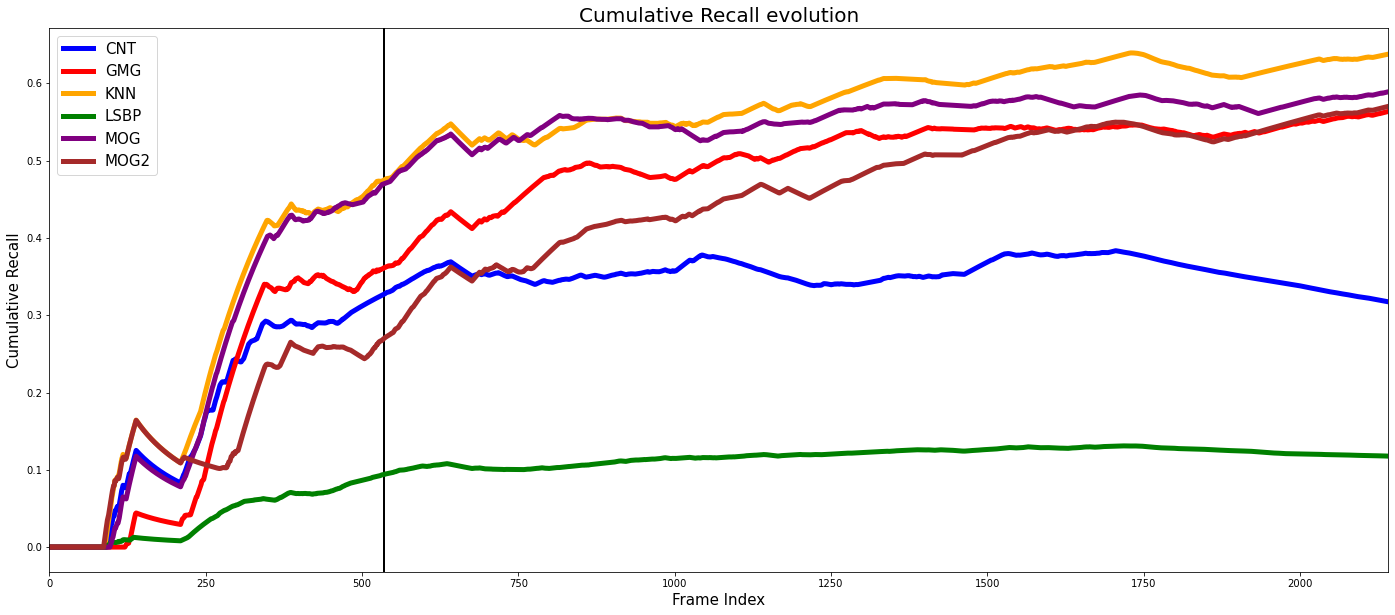

In [35]:
import matplotlib.pyplot as plt
import pickle

total_frames = 2141
start_frame = 535

filename = './../model_logs_full_learn/AR_model_CNT.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
recall_list_CNT = data['recall_list']
cumulative_CNT = [sum(recall_list_CNT[:i+1])/len(recall_list_CNT[:i+1]) for i in range(len(recall_list_CNT))]

filename = './../model_logs_full_learn/AR_model_GMG.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
recall_list_GMG = data['recall_list']
cumulative_GMG = [sum(recall_list_GMG[:i+1])/len(recall_list_CNT[:i+1]) for i in range(len(recall_list_GMG))]

filename = './../model_logs_full_learn/AR_model_KNN.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
recall_list_KNN = data['recall_list']
cumulative_KNN = [sum(recall_list_KNN[:i+1])/len(recall_list_CNT[:i+1]) for i in range(len(recall_list_KNN))]

filename = './../model_logs_full_learn/AR_model_LSBP.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
recall_list_LSBP = data['recall_list']
cumulative_LSBP = [sum(recall_list_LSBP[:i+1])/len(recall_list_CNT[:i+1]) for i in range(len(recall_list_LSBP))]

filename = './../model_logs_full_learn/AR_model_MOG.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
recall_list_MOG = data['recall_list']
cumulative_MOG = [sum(recall_list_MOG[:i+1])/len(recall_list_CNT[:i+1]) for i in range(len(recall_list_MOG))]

filename = './../model_logs_full_learn/AR_model_MOG2.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
recall_list_MOG2 = data['recall_list']
cumulative_MOG2 = [sum(recall_list_MOG2[:i+1])/len(recall_list_CNT[:i+1]) for i in range(len(recall_list_MOG2))]


frame_indices = list(range(len(recall_list_CNT)))

#%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(24, 10))

#plt.scatter(frame_indices, cumulative_CNT, color='blue', ls= '-')# Adjust alpha for opacity as desired
#plt.plot(frame_indices, precision_list_MOG2, color='blue', ls= '.')
#plt.scatter(frame_indices, precision_list_CNT, color='red', ls= '-')# Adjust alpha for opacity as desired

#plt.plot(frame_indices, precision_list_MOG, color='orange', alpha=0.2)  # Adjust alpha for opacity as desired
#plt.plot(frame_indices, precision_list_CNT, color='green', alpha=0.2)  # Adjust alpha for opacity as desired

plt.axvline(x=start_frame, color='black', linestyle='-', linewidth=2)

plt.plot(frame_indices, cumulative_CNT, color='blue', ls= '-', label="CNT", linewidth=5)
plt.plot(frame_indices, cumulative_GMG, color='red', ls= '-', label="GMG", linewidth=5)
plt.plot(frame_indices, cumulative_KNN, color='orange', ls= '-', label="KNN", linewidth=5)
plt.plot(frame_indices, cumulative_LSBP, color='green', ls= '-', label="LSBP", linewidth=5)
plt.plot(frame_indices, cumulative_MOG, color='purple', ls= '-', label="MOG", linewidth=5)
plt.plot(frame_indices, cumulative_MOG2, color='brown', ls= '-', label="MOG2", linewidth=5)


plt.title('Cumulative Recall evolution', fontsize=20)
plt.xlabel('Frame Index', fontsize=15)
plt.ylabel('Cumulative Recall', fontsize=15)
plt.legend(fontsize=15)

plt.xlim(0, total_frames)

plt.show()


CNT: 0.4333200881077439
GMG: 0.6692965438143339
KNN: 0.7471094227988885
LSBP: 0.14092352418393597
MOG: 0.6692965438143339
MOG2: 0.7227248297645307
1606


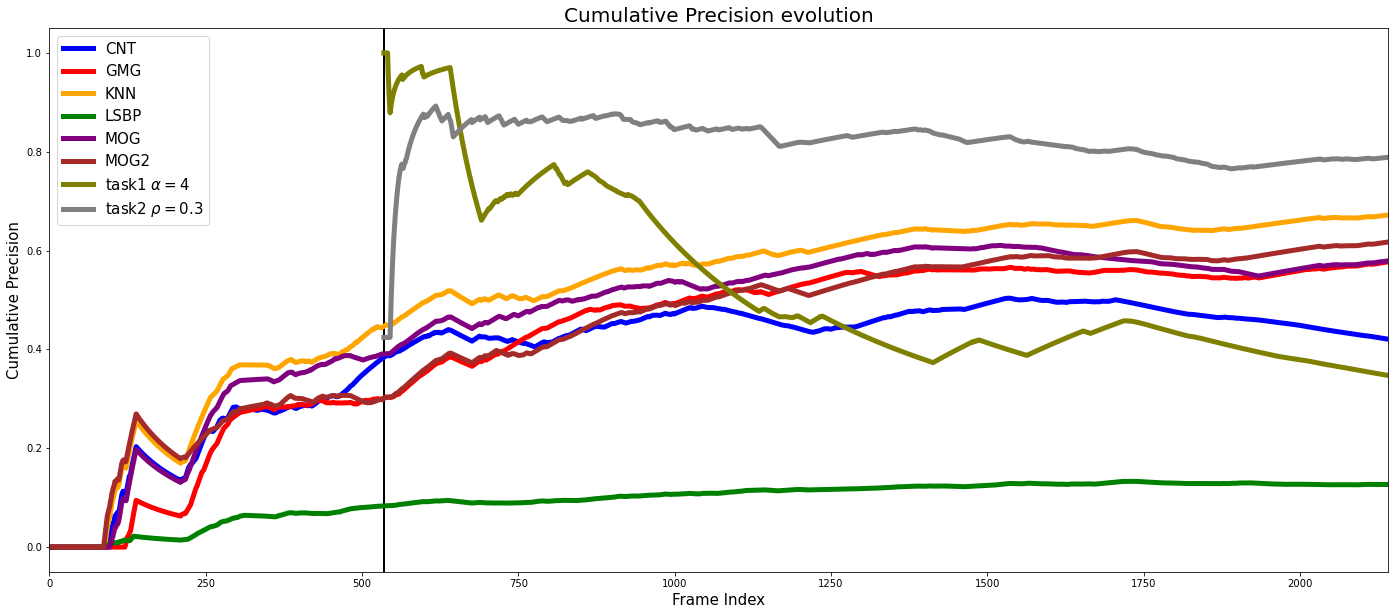

In [54]:
total_frames = 2141
start_frame = 535

filename = './../model_logs_full_learn/AP_model_CNT.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
precision_list_CNT = data['precision_list']
cumulative_CNT = [sum(precision_list_CNT[:i+1])/len(precision_list_CNT[:i+1]) for i in range(len(precision_list_CNT))]
cumulative_CNT_75 = [sum(precision_list_CNT[535:i+1])/(len(precision_list_CNT[535:i+1])) for i in range(535, len(precision_list_CNT))][-1]
print("CNT:", cumulative_CNT_75)

filename = './../model_logs_full_learn/AP_model_GMG.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
precision_list_GMG = data['precision_list']
cumulative_GMG = [sum(precision_list_GMG[:i+1])/len(precision_list_CNT[:i+1]) for i in range(len(precision_list_GMG))]
cumulative_GMG_75 = [sum(precision_list_GMG[535:i+1])/(len(precision_list_GMG[535:i+1])) for i in range(535, len(precision_list_CNT))][-1]
print("GMG:", cumulative_GMG_75)

filename = './../model_logs_full_learn/AP_model_KNN.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
precision_list_KNN = data['precision_list']
cumulative_KNN = [sum(precision_list_KNN[:i+1])/len(precision_list_CNT[:i+1]) for i in range(len(precision_list_KNN))]
cumulative_KNN_75 = [sum(precision_list_KNN[535:i+1])/(len(precision_list_GMG[535:i+1])) for i in range(535, len(precision_list_CNT))][-1]
print("KNN:", cumulative_KNN_75)

filename = './../model_logs_full_learn/AP_model_LSBP.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
precision_list_LSBP = data['precision_list']
cumulative_LSBP = [sum(precision_list_LSBP[:i+1])/len(precision_list_CNT[:i+1]) for i in range(len(precision_list_LSBP))]
cumulative_LSBP_75 = [sum(precision_list_LSBP[535:i+1])/(len(precision_list_GMG[535:i+1])) for i in range(535, len(precision_list_CNT))][-1]
print("LSBP:", cumulative_LSBP_75)

filename = './../model_logs_full_learn/AP_model_MOG.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
precision_list_MOG = data['precision_list']
cumulative_MOG = [sum(precision_list_MOG[:i+1])/len(precision_list_CNT[:i+1]) for i in range(len(precision_list_MOG))]
cumulative_MOG_75 = [sum(precision_list_MOG[535:i+1])/(len(precision_list_GMG[535:i+1])) for i in range(535, len(precision_list_CNT))][-1]
print("MOG:", cumulative_GMG_75)

filename = './../model_logs_full_learn/AP_model_MOG2.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
precision_list_MOG2 = data['precision_list']
cumulative_MOG2 = [sum(precision_list_MOG2[:i+1])/len(precision_list_CNT[:i+1]) for i in range(len(precision_list_MOG2))]
cumulative_MOG2_75 = [sum(precision_list_MOG2[535:i+1])/(len(precision_list_GMG[535:i+1])) for i in range(535, len(precision_list_CNT))][-1]
print("MOG2:", cumulative_MOG2_75)



filename = './../../task2/results_0.2_3.5_ap.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
    
precision_list_task2_1 = data
cumulative_task2_1 = [sum(precision_list_task2_1[:i+1])/len(precision_list_task2_1[:i+1]) for i in range(len(precision_list_task2_1))]
print(len(precision_list_task2_1))

filename = './../../task1/alpha_logs/AP_alpha_4.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
precision_list_12 = data['precision_list']
cumulative_task12 = [sum(precision_list_12[:i+1])/len(precision_list_12[:i+1]) for i in range(len(precision_list_12))]


frame_indices1 = list(range(len(precision_list_CNT)))
frame_indices2 = list(range(start_frame, start_frame + len(precision_list_task2_1)))

#%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(24, 10))

#plt.scatter(frame_indices, cumulative_CNT, color='blue', ls= '-')# Adjust alpha for opacity as desired
#plt.plot(frame_indices, precision_list_MOG2, color='blue', ls= '.')
#plt.scatter(frame_indices, precision_list_CNT, color='red', ls= '-')# Adjust alpha for opacity as desired

#plt.plot(frame_indices, precision_list_MOG, color='orange', alpha=0.2)  # Adjust alpha for opacity as desired
#plt.plot(frame_indices, precision_list_CNT, color='green', alpha=0.2)  # Adjust alpha for opacity as desired

plt.axvline(x=start_frame, color='black', linestyle='-', linewidth=2)

plt.plot(frame_indices1, cumulative_CNT, color='blue', ls= '-', label="CNT", linewidth=5)
plt.plot(frame_indices1, cumulative_GMG, color='red', ls= '-', label="GMG", linewidth=5)
plt.plot(frame_indices1, cumulative_KNN, color='orange', ls= '-', label="KNN", linewidth=5)
plt.plot(frame_indices1, cumulative_LSBP, color='green', ls= '-', label="LSBP", linewidth=5)
plt.plot(frame_indices1, cumulative_MOG, color='purple', ls= '-', label="MOG", linewidth=5)
plt.plot(frame_indices1, cumulative_MOG2, color='brown', ls= '-', label="MOG2", linewidth=5)

plt.plot(frame_indices2, cumulative_task12, color='olive', ls= '-', label="task1 $\\alpha=4$", linewidth=5)
plt.plot(frame_indices2, cumulative_task2_1, color='gray', ls= '-', label="task2 $\\rho=0.3$", linewidth=5)

#plt.plot(frame_indices, cumulative_task11, color='black', ls= '-', label="MOG2", linewidth=5)

#plt.plot(frame_indices, cumulative_task13, color='green', ls= '-', label="MOG2", linewidth=5)
#plt.plot(frame_indices, cumulative_task14, color='yellow', ls= '-', label="MOG2", linewidth=5)
#plt.plot(frame_indices, cumulative_task15, color='orange', ls= '-', label="MOG2", linewidth=5)
#plt.plot(frame_indices, cumulative_task16, color='blue', ls= '-', label="MOG2", linewidth=5)
#plt.plot(frame_indices, cumulative_task17, color='brown', ls= '-', label="MOG2", linewidth=5)



plt.title('Cumulative Precision evolution', fontsize=20)
plt.xlabel('Frame Index', fontsize=15)
plt.ylabel('Cumulative Precision', fontsize=15)
plt.legend(fontsize=15)

plt.xlim(0, total_frames)

plt.show()


Model: CNT => recall avg = 0.013836371183818265
Model: GMG => recall avg = 0.06305898335786268
Model: KNN => recall avg = 0.40400958526736813
Model: LSBP => recall avg = 0.12201403826559566
Model: MOG => recall avg = 0.3765981735159795
Model: MOG2 => recall avg = 0.11178723725423616


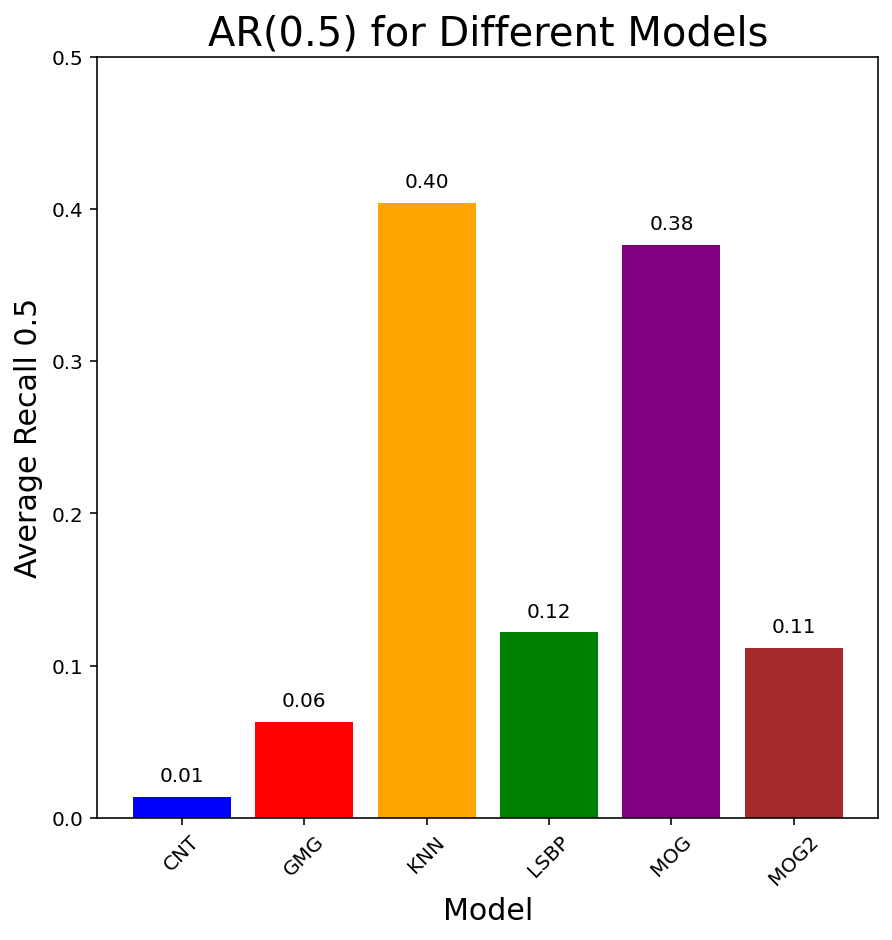

In [64]:
model_recalls = {}

model_names = ["CNT", "GMG", "KNN", "LSBP", "MOG", "MOG2"]
colors = ["blue", "red", "orange", "green", "purple", "brown"]

for name in model_names:
    filename = f'./../model_logs_detectron/AR_model_{name}.pkl'
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    recall_list = data['recall_list']
    model_recalls[name] = sum(recall_list) / len(recall_list)
    print(f"Model: {name} => recall avg = {sum(recall_list) / len(recall_list)}")


recalls = list(model_recalls.keys())
avg_recalls = list(model_recalls.values())

plt.figure(figsize=(7, 7))
plt.bar(recalls, avg_recalls, color=colors)

plt.title('AR(0.5) for Different Models', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Average Recall 0.5', fontsize=15)
plt.ylim(0, 0.5)


for i in range(len(recalls)):
    plt.text(i, avg_recalls[i] + 0.01, f"{avg_recalls[i]:.2f}", ha = 'center')

plt.xticks(rotation=45)
plt.show()


Model: CNT => precision avg = 0.4208684100951401
Model: GMG => precision avg = 0.5770882190898863
Model: KNN => precision avg = 0.6718887405983579
Model: LSBP => precision avg = 0.12653452927978093
Model: MOG => precision avg = 0.5791383361476381
Model: MOG2 => precision avg = 0.6172359351741695


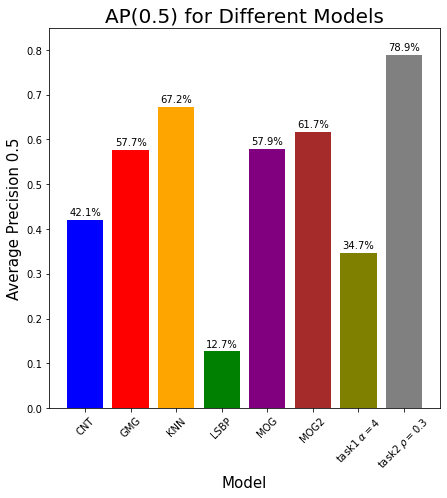

In [49]:
model_precisions = {}

model_names = ["CNT", "GMG", "KNN", "LSBP", "MOG", "MOG2"]
colors = ["blue", "red", "orange", "green", "purple", "brown", "olive", "gray"]

for name in model_names:
    filename = f'./../model_logs_full_learn/AP_model_{name}.pkl'
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    precision_list = data['precision_list']
    model_precisions[name] = sum(precision_list) / len(precision_list)
    print(f"Model: {name} => precision avg = {sum(precision_list) / len(precision_list)}")


precisions = list(model_precisions.keys())
precisions.append("task1 $\\alpha=4$")
precisions.append("task2 $\\rho=0.3$")

avg_precisions = list(model_precisions.values())
avg_precisions.append(cumulative_task12[-1])
avg_precisions.append(cumulative_task2_1[-1])

plt.figure(figsize=(7, 7))
plt.bar(precisions, avg_precisions, color=colors)

plt.title('AP(0.5) for Different Models', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Average Precision 0.5', fontsize=15)
plt.ylim(0, 0.85)


for i in range(len(precisions)):
    plt.text(i, avg_precisions[i] + 0.01, f"{avg_precisions[i]*100:.1f}%", ha = 'center')

plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


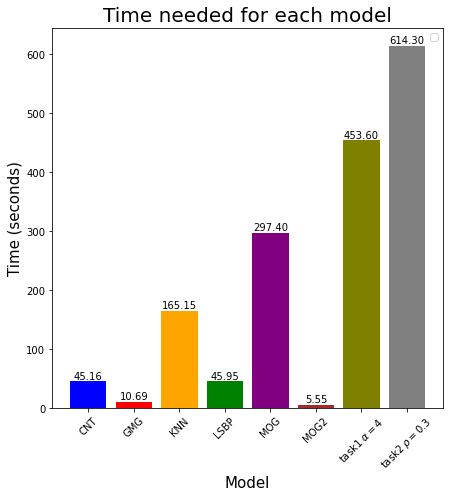

In [32]:
# THIS IS AN INITIAL ONE, IT IS NOT THE DEFINITIVE, SINCE WE CHANGED
# THINGS, THE GOOD ONE IS THE FOLLOWING

model_names = ["CNT", "GMG", "KNN", "LSBP", "MOG", "MOG2"]
model_names.append("task1 $\\alpha=4$")
model_names.append("task2 $\\rho=0.3$")
colors = ["blue", "red", "orange", "green", "purple", "brown", "olive", "gray"]

filename = './../model_logs_detectron/time_comparison.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)

vals = list(data.values())
vals.append(453.6)
vals.append(614.3)
    
plt.figure(figsize=(7, 7))
plt.bar(model_names, vals, color=colors)

plt.title('Time needed for each model', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Time (seconds)', fontsize=15)
plt.ylim()


for algorithm, time in zip(model_names, vals):
    plt.text(algorithm, time, f'{time:.2f}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()


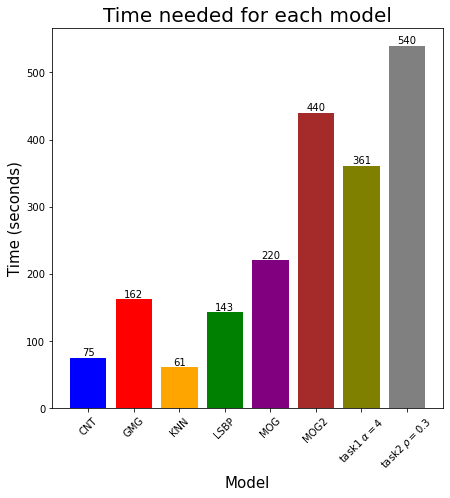

In [51]:
model_names = ["CNT", "GMG", "KNN", "LSBP", "MOG", "MOG2"]
model_names.append("task1 $\\alpha=4$")
model_names.append("task2 $\\rho=0.3$")
colors = ["blue", "red", "orange", "green", "purple", "brown", "olive", "gray"]

vals = [75, 162, 61, 143, 220, 440, 361, 540]

plt.figure(figsize=(7, 7))
plt.bar(model_names, vals, color=colors)

plt.title('Time needed for each model', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Time (seconds)', fontsize=15)
plt.ylim()


for algorithm, time in zip(model_names, vals):
    plt.text(algorithm, time, f'{time}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()